In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [41]:
df=pd.read_csv("dataset/train.csv")
pd.set_option('display.max_columns',100)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [43]:
app=['Online boarding', 'Inflight wifi service', 'Class', 'Type of Travel', 'Flight Distance', 'Inflight entertainment', 'Seat comfort', 'Leg room service', 'On-board service', 'Ease of Online booking', 'Cleanliness']
for col in app:
    print(f"{col} unique values: {df[col].unique()}")
    

Online boarding unique values: [3 5 2 1 4 0]
Inflight wifi service unique values: [3 2 4 1 5 0]
Class unique values: ['Eco Plus' 'Business' 'Eco']
Type of Travel unique values: ['Personal Travel' 'Business travel']
Flight Distance unique values: [ 460  235 1142 ...  974 1479  400]
Inflight entertainment unique values: [5 1 2 3 4 0]
Seat comfort unique values: [5 1 2 3 4 0]
Leg room service unique values: [3 5 4 2 1 0]
On-board service unique values: [4 1 2 3 5 0]
Ease of Online booking unique values: [3 2 5 4 1 0]
Cleanliness unique values: [5 1 2 3 4 0]


In [3]:
df=df.drop(['Unnamed: 0','id'],axis=1)

In [4]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.shape

(103904, 23)

In [6]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [7]:
df.duplicated().sum()

0

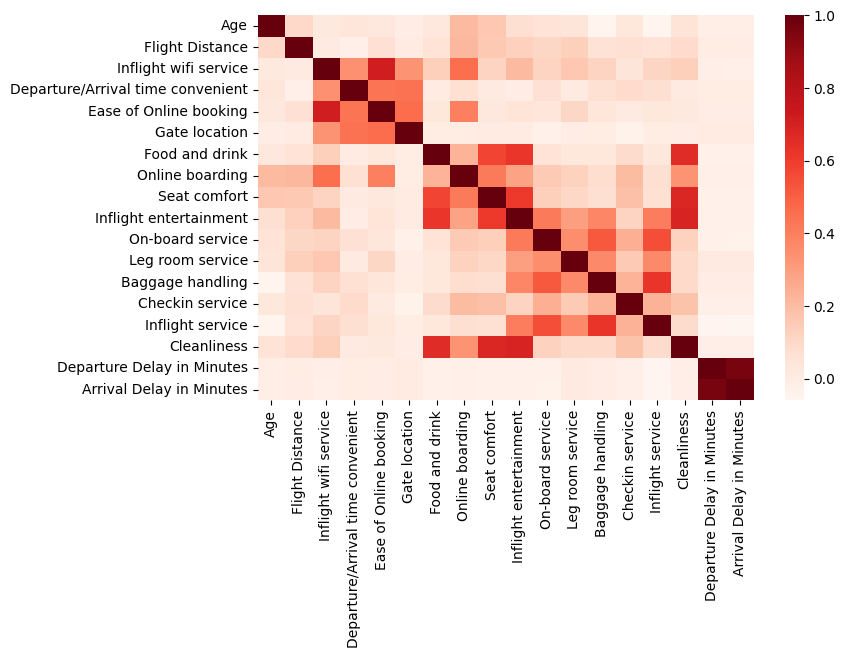

In [8]:
num_df=df.select_dtypes(include='number')
corr=num_df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr,cmap="Reds")
plt.show()

In [9]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


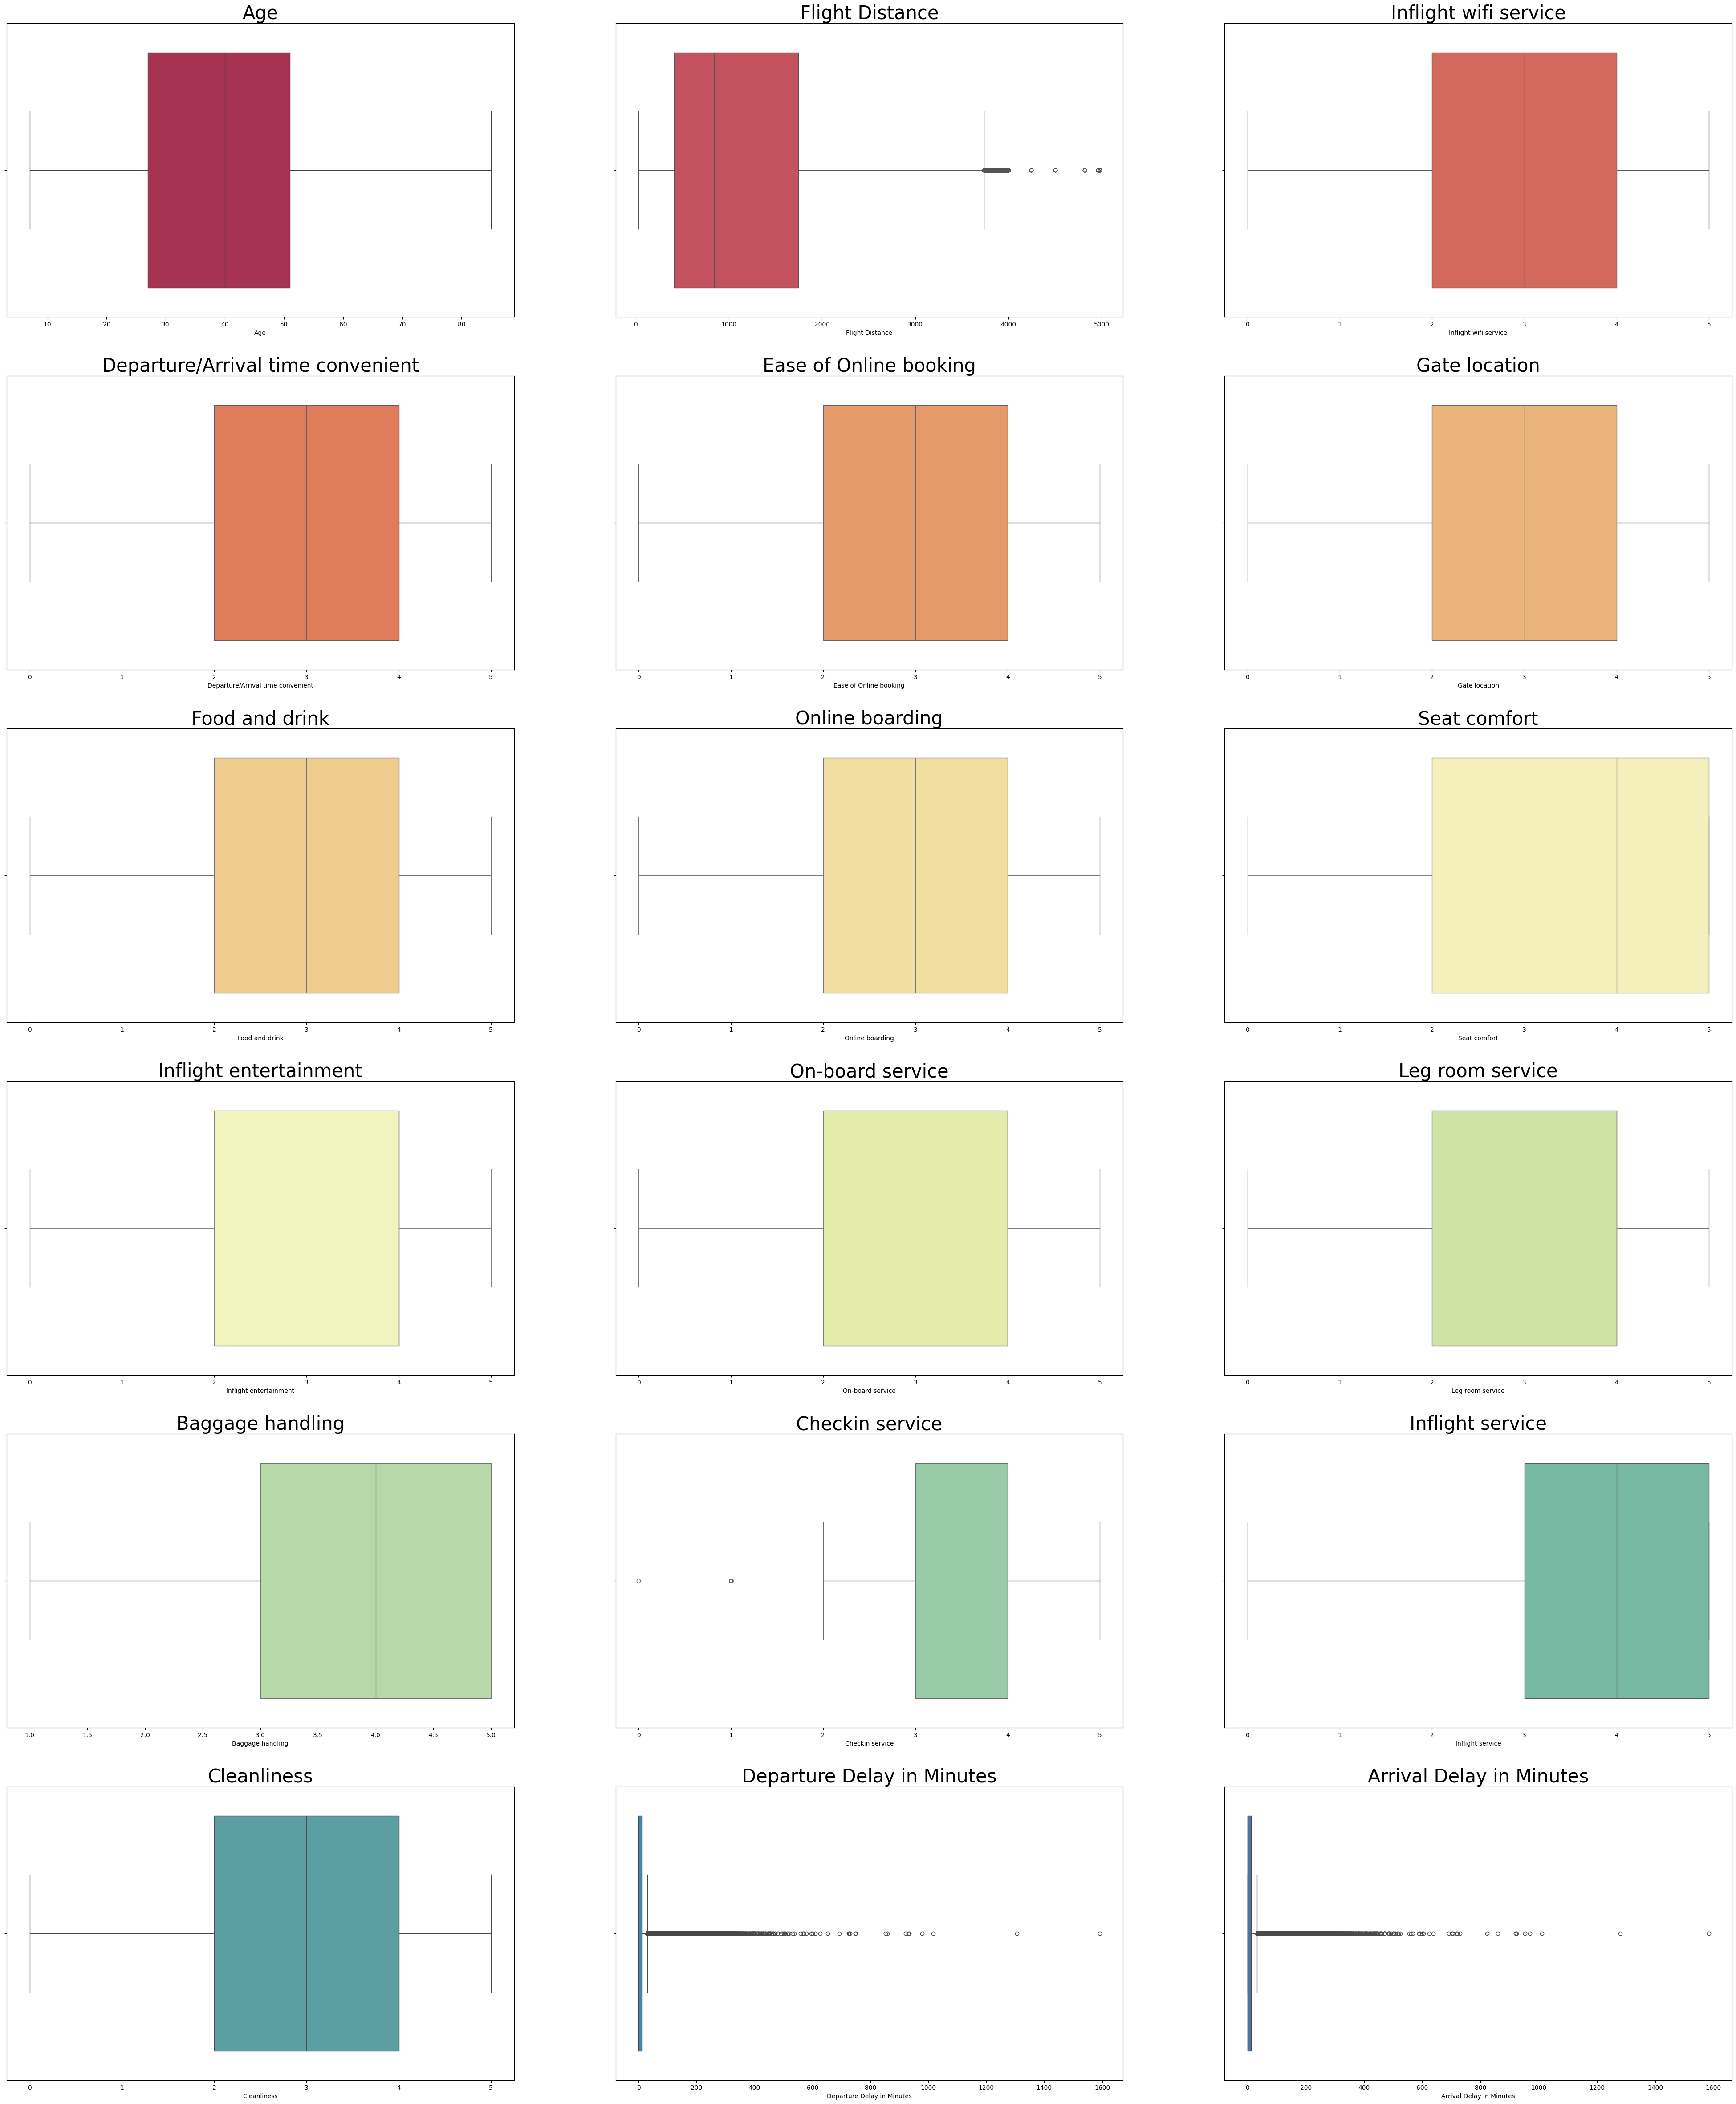

In [10]:
numerical=df.select_dtypes(include=['int','float'])
Spectral_palette=sns.color_palette('Spectral',n_colors=len(numerical.columns))

fig,axes=plt.subplots(6,3,figsize=(50,60))
axes=axes.flatten()

for i,col in enumerate(numerical.columns):
    sns.boxplot(x=df[col],ax=axes[i],color=Spectral_palette[i])
    axes[i].set_title(col,fontsize=30)

plt.show()

In [11]:
def handle_outliers(df,cols):
    for col in cols:
        Q1=df[col].quantile(0.25)
        Q3=df[col].quantile(0.75)
        IQR=Q3-Q1

        lower_bound=Q1-1.5*IQR
        upper_bound=Q3+1.5*IQR
        df[col]=df[col].clip(lower=lower_bound,upper=upper_bound)
    return df
cols=['Flight Distance','Checkin service','Departure Delay in Minutes','Arrival Delay in Minutes']
df=handle_outliers(df,cols)

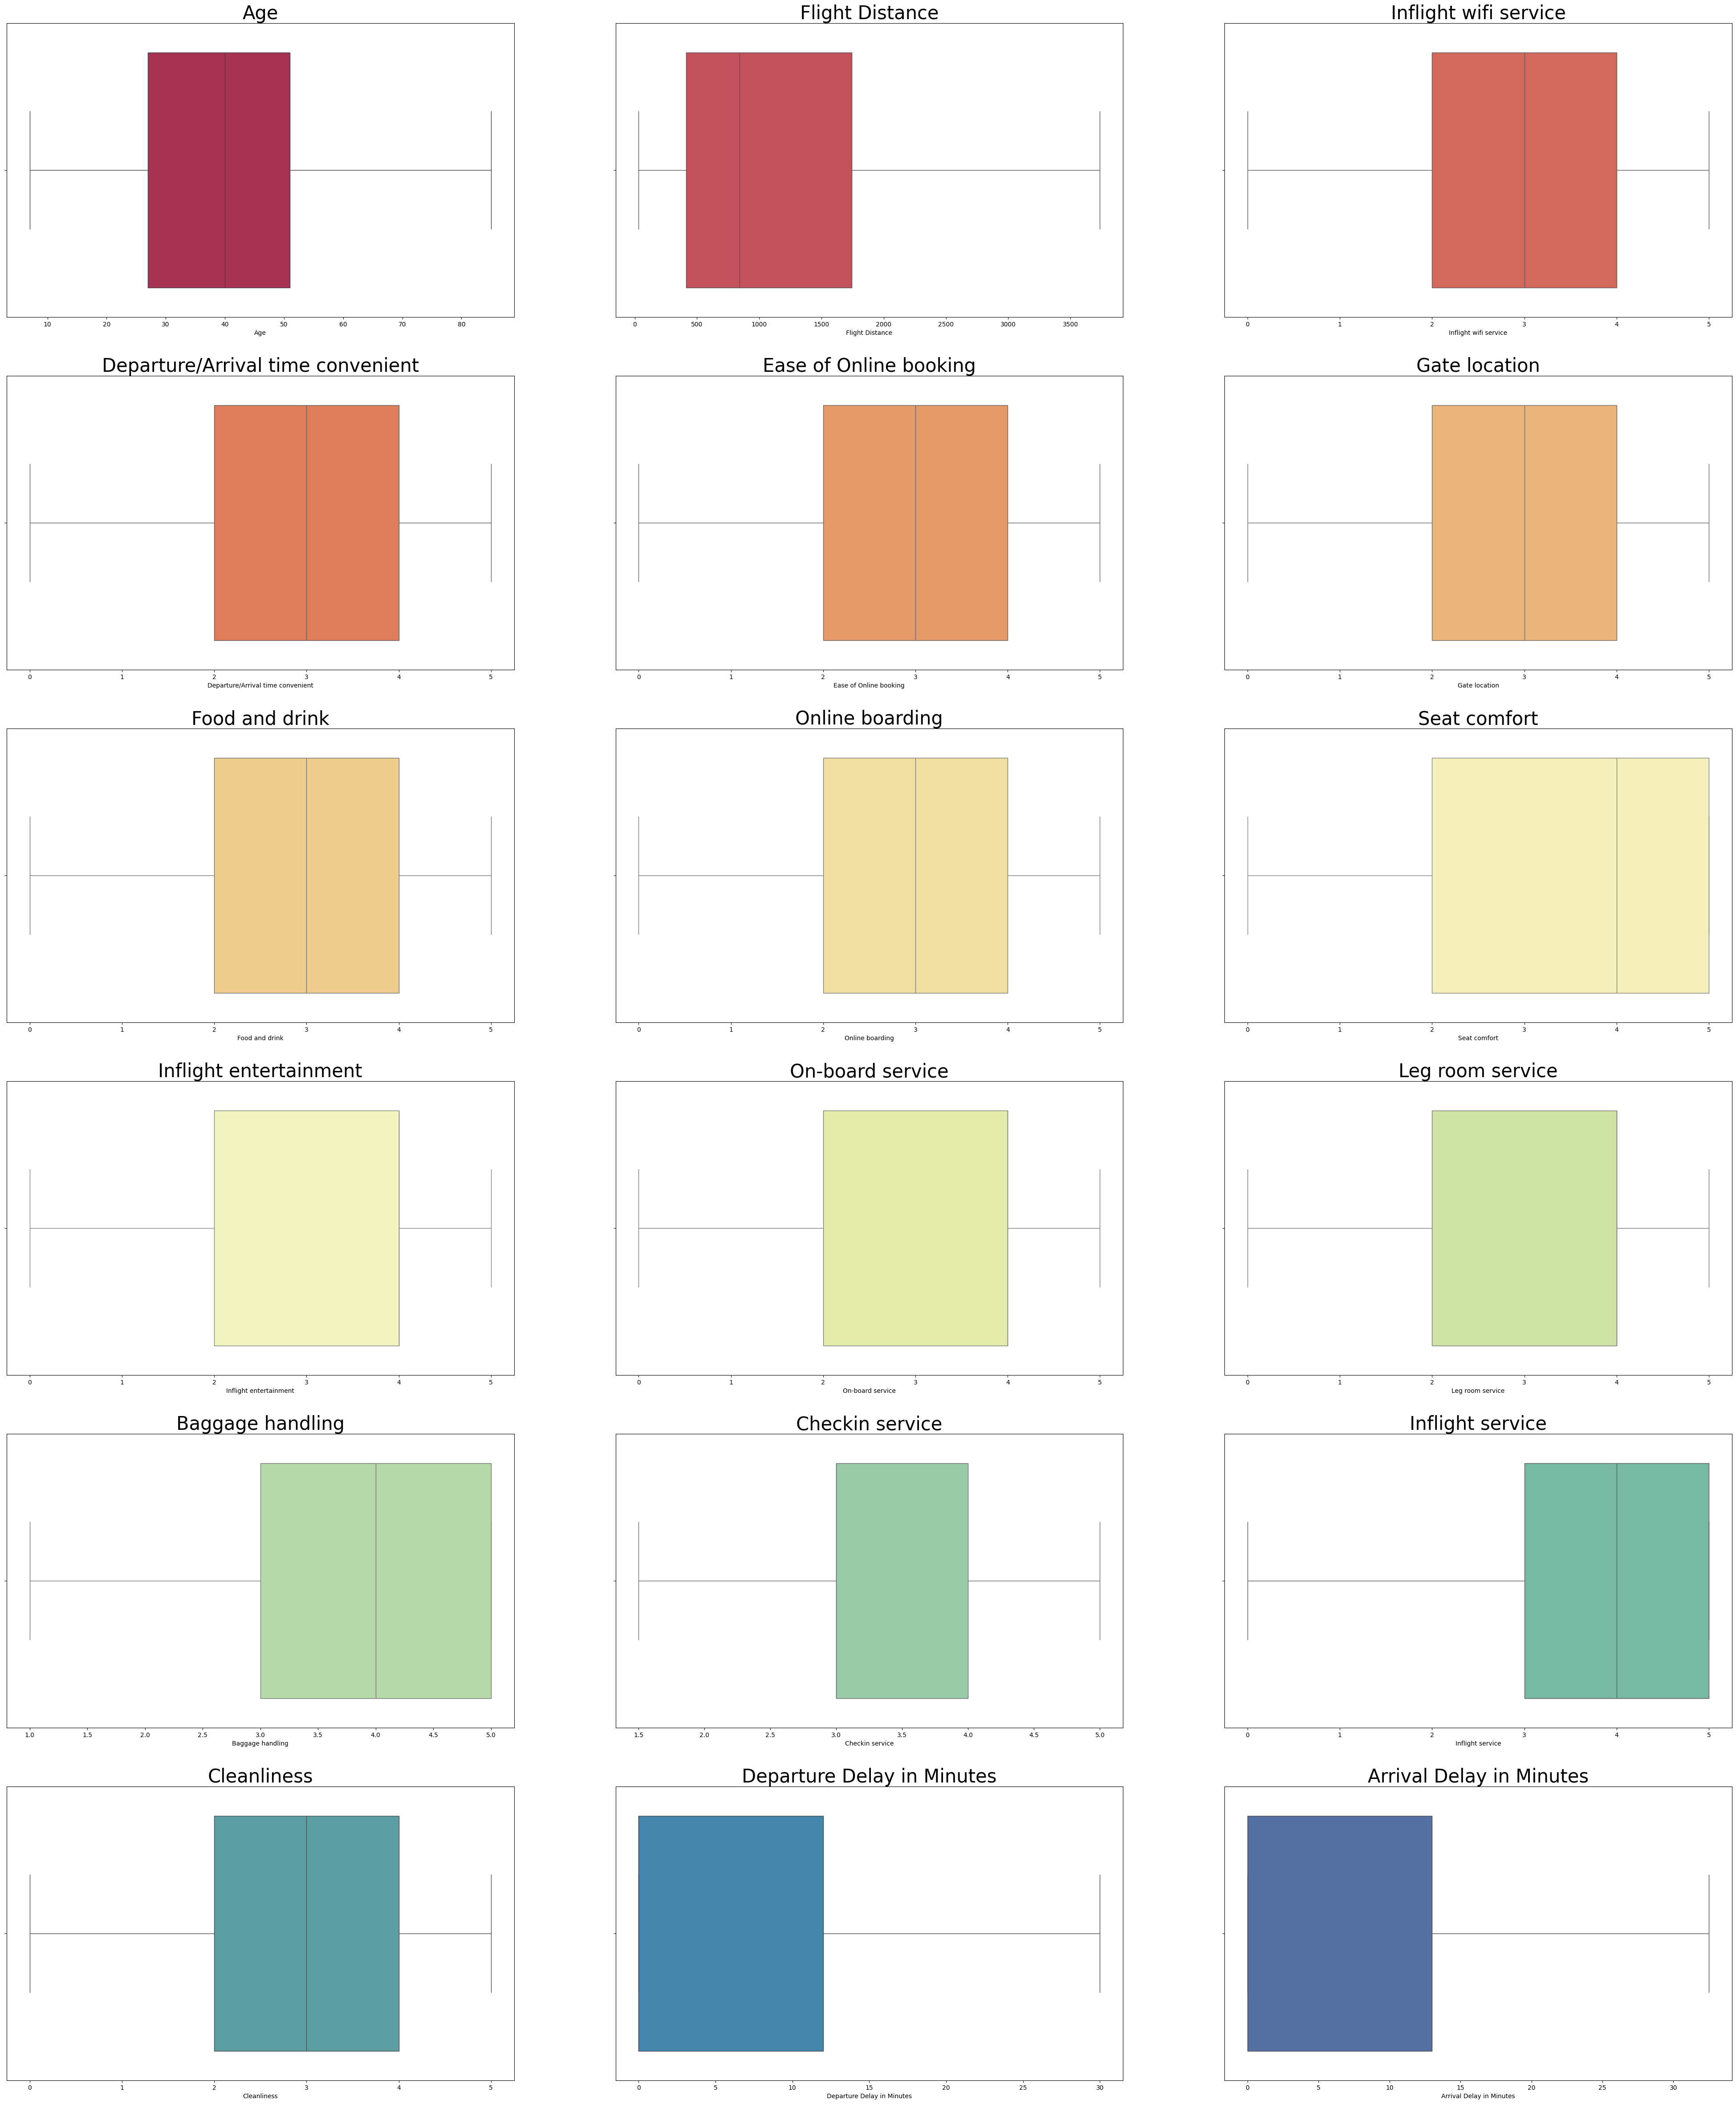

In [12]:
numerical=df.select_dtypes(include=['int','float'])
Spectral_palette=sns.color_palette('Spectral',n_colors=len(numerical.columns))

fig,axes=plt.subplots(6,3,figsize=(50,60))
axes=axes.flatten()

for i,col in enumerate(numerical.columns):
    sns.boxplot(x=df[col],ax=axes[i],color=Spectral_palette[i])
    axes[i].set_title(col,fontsize=30)

plt.show()

In [13]:
df['Arrival Delay in Minutes']=df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [14]:
df.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [15]:
new_df=df.copy()

In [16]:
cols_with_six_categories=new_df.columns[new_df.nunique()==6]
cols_with_six_categories

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Inflight service',
       'Cleanliness'],
      dtype='object')

In [17]:
new_df["Inflight wifi service"].value_counts()

Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: count, dtype: int64

In [18]:
ordinal_mapping={
    0:"Very Poor",
    1:"Poor",
    2:"Average",
    3:"Good",
    4:"Excellent",
    5:"Outstanding"
}

In [19]:
new_df[cols_with_six_categories]=new_df[cols_with_six_categories].applymap(lambda x: ordinal_mapping.get(x,x))

In [20]:
new_df.head

<bound method NDFrame.head of         Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance Inflight wifi service  \
0                 460.0                  Good   
1                 235.0                  Go

In [21]:
df['Baggage handling'].value_counts()

Baggage handling
4    37383
5    27131
3    20632
2    11521
1     7237
Name: count, dtype: int64

In [22]:
mapping={
    1:"Very Poor",
    2:"Poor",
    3:"Average",
    4:"Good",
    5:"Excellent",
}
new_df['Baggage handling']=new_df['Baggage handling'].apply(lambda x: ordinal_mapping.get(x,x))

In [23]:
new_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,Excellent,4.0,Outstanding,Outstanding,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,Good,Average,Good,Good,Poor,Good,Poor,Poor,Poor,Outstanding,Good,1.5,Excellent,Poor,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,Average,Average,Average,Average,Outstanding,Outstanding,Outstanding,Outstanding,Excellent,Good,Excellent,4.0,Excellent,Outstanding,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,Average,Outstanding,Outstanding,Outstanding,Average,Average,Average,Average,Average,Outstanding,Good,1.5,Excellent,Average,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,Good,Good,Good,Good,Excellent,Outstanding,Outstanding,Good,Good,Excellent,Excellent,3.0,Good,Good,0,0.0,satisfied


In [24]:
df['Checkin service'].value_counts()

Checkin service
4.0    29055
3.0    28446
5.0    20619
2.0    12893
1.5    12891
Name: count, dtype: int64

In [25]:
mapping={
    1.5:"Very Poor",
    2.0:"Poor",
    3.0:"Average",
    4.0:"Good",
    5.0:"Excellent",
}
new_df['Checkin service']=new_df['Checkin service'].apply(lambda x: ordinal_mapping.get(x,x))

In [26]:
new_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,Good,Excellent,Good,Poor,Outstanding,Good,Outstanding,Outstanding,Excellent,Good,Excellent,Excellent,Outstanding,Outstanding,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,Good,Average,Good,Good,Poor,Good,Poor,Poor,Poor,Outstanding,Good,1.5,Excellent,Poor,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,Average,Average,Average,Average,Outstanding,Outstanding,Outstanding,Outstanding,Excellent,Good,Excellent,Excellent,Excellent,Outstanding,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,Average,Outstanding,Outstanding,Outstanding,Average,Average,Average,Average,Average,Outstanding,Good,1.5,Excellent,Average,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,Good,Good,Good,Good,Excellent,Outstanding,Outstanding,Good,Good,Excellent,Excellent,Good,Good,Good,0,0.0,satisfied


In [27]:
numeric_cols=['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes']
categorical_cols=['Gender','Customer Type','Type of Travel','Class','Inflight wifi service','Departure/Arrival time convenient',
                  'Ease of Online booking','Gate location','Food and drink',
                  'Online boarding','Seat comfort','Inflight entertainment',
                  'On-board service','Leg room service','Baggage handling',
                  'Checkin service','Inflight service','Cleanliness']

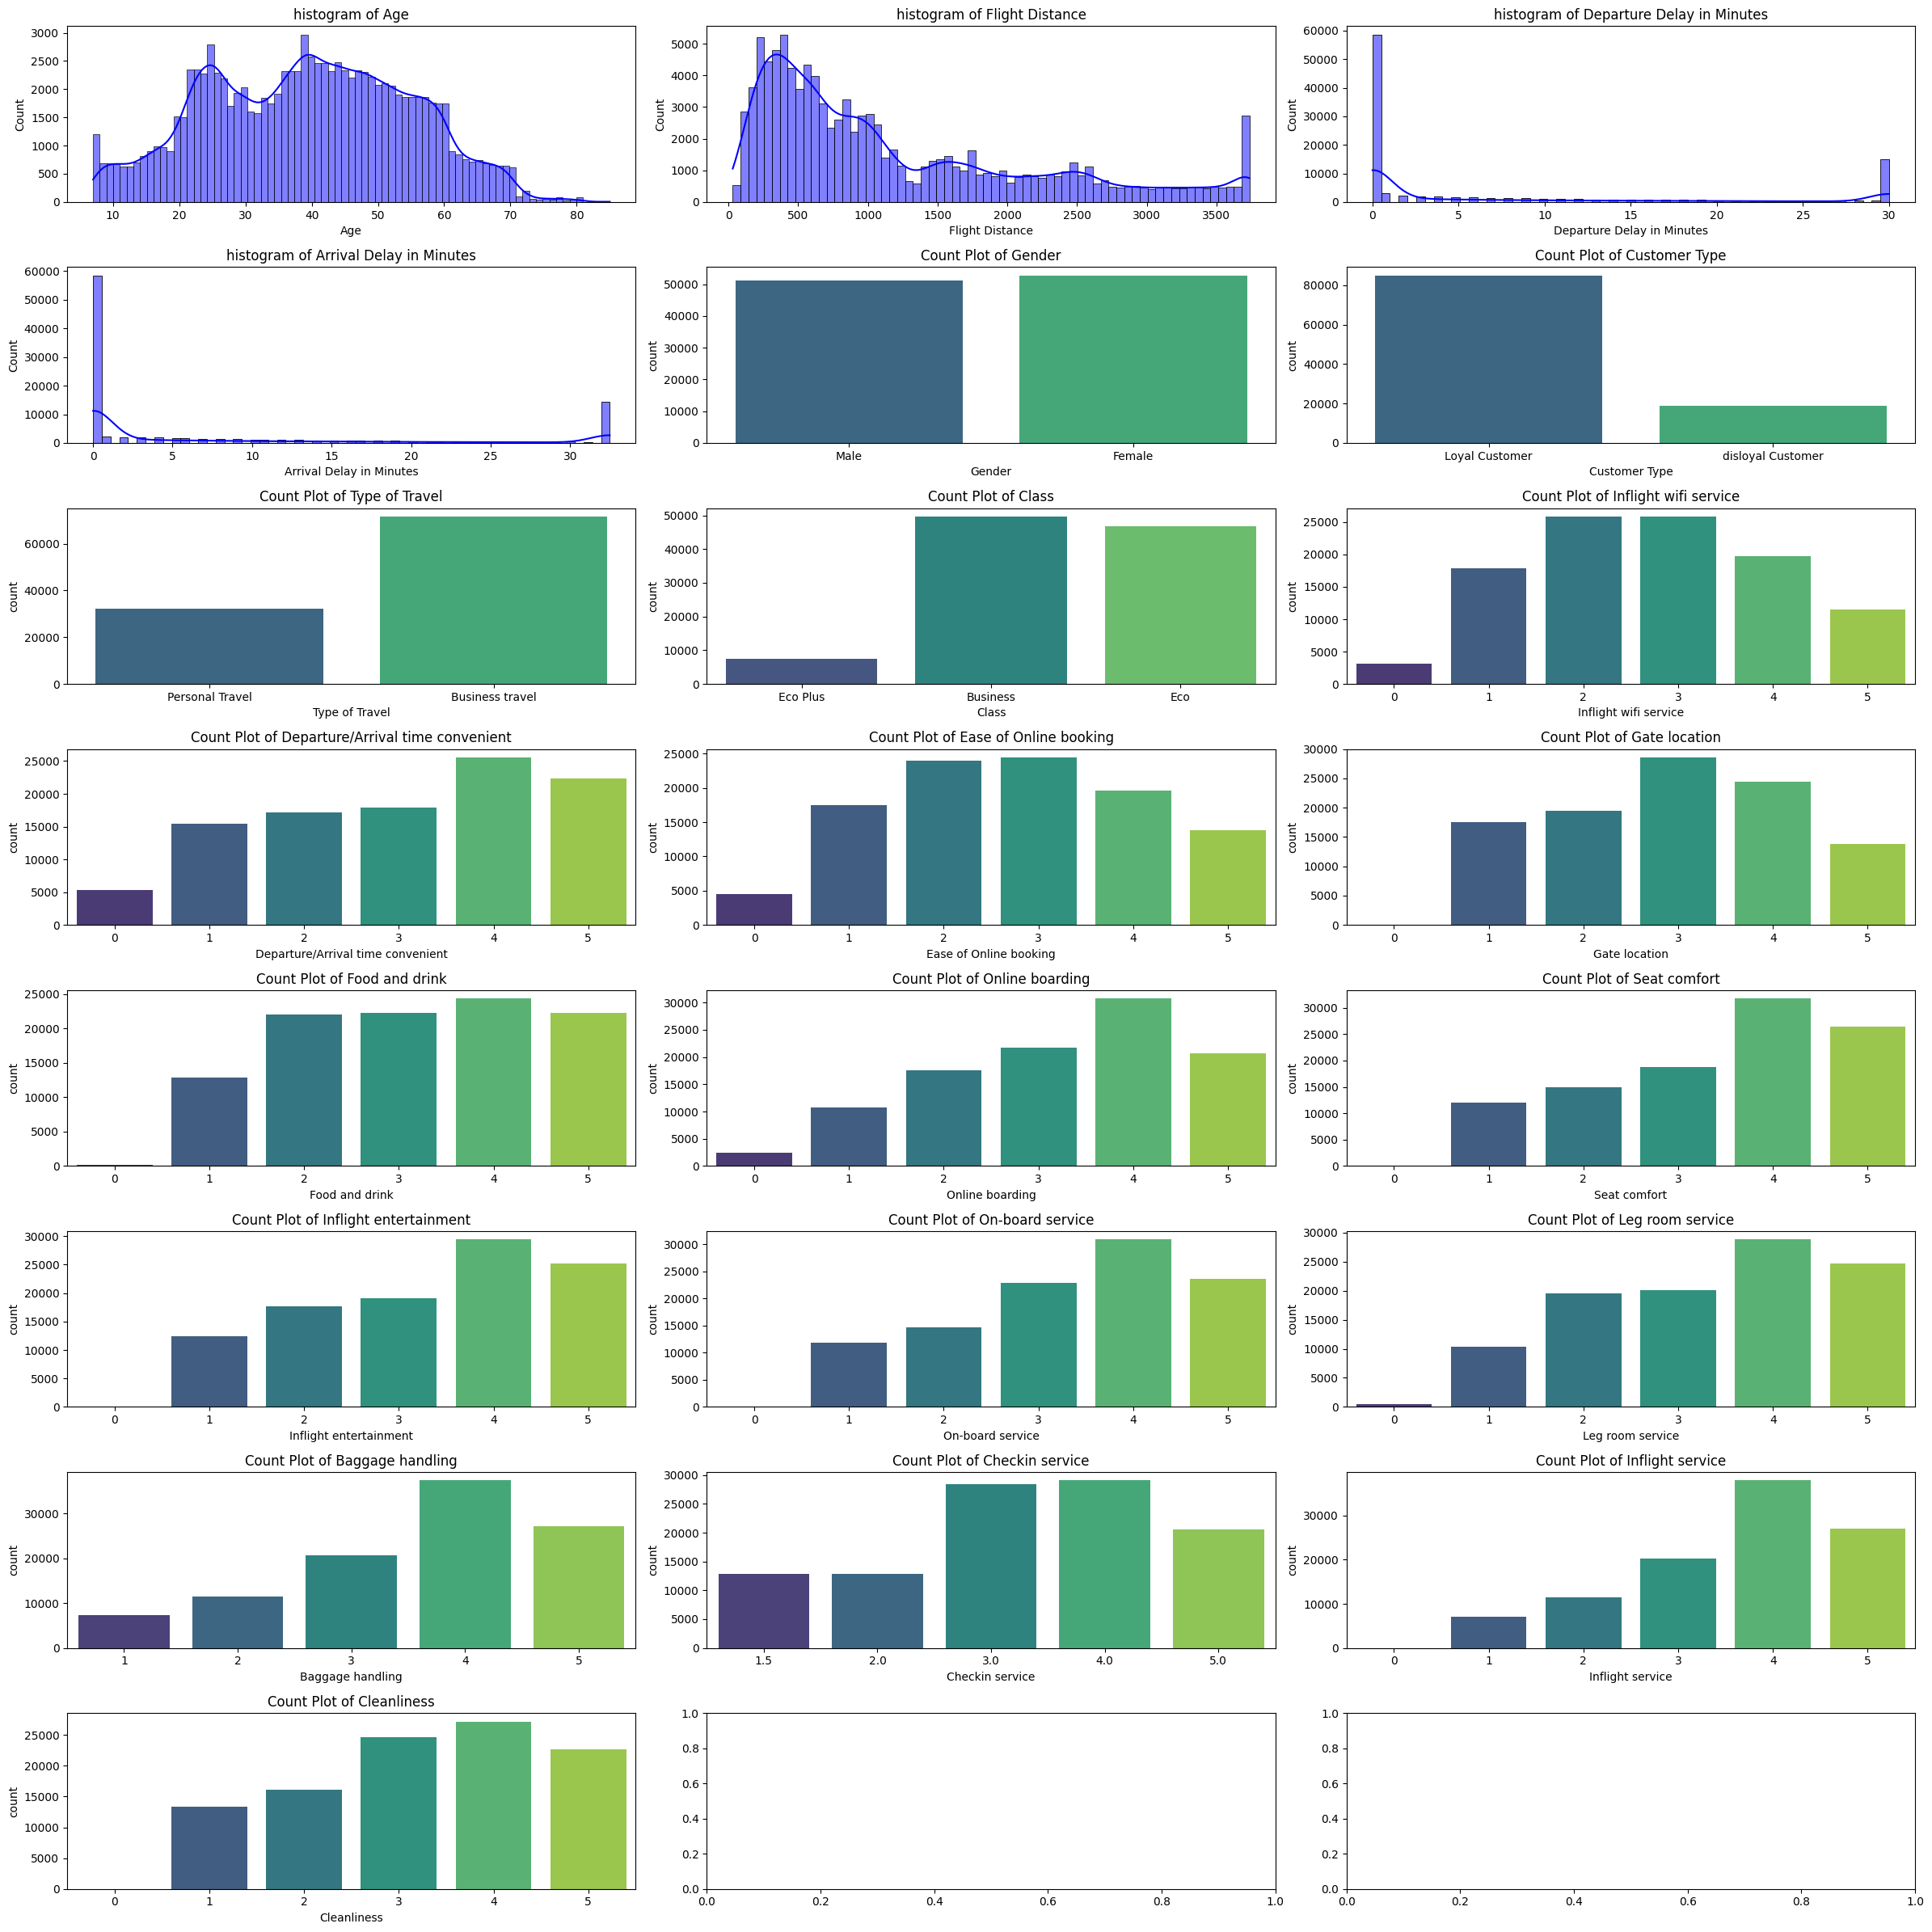

In [28]:
fig,axes=plt.subplots(8,3,figsize=(24,24))
axes=axes.flatten()

for i,col in enumerate(numeric_cols):
    sns.histplot(df[col],kde=True,ax=axes[i],color="blue")
    axes[i].set_title(f'histogram of {col}')


for j,col in enumerate(categorical_cols):
    if i+1+j<len(axes):
        sns.countplot(x=df[col],ax=axes[i+1+j],palette='viridis')
        axes[i+1+j].set_title(f'Count Plot of {col}')

plt.tight_layout()
plt.show()

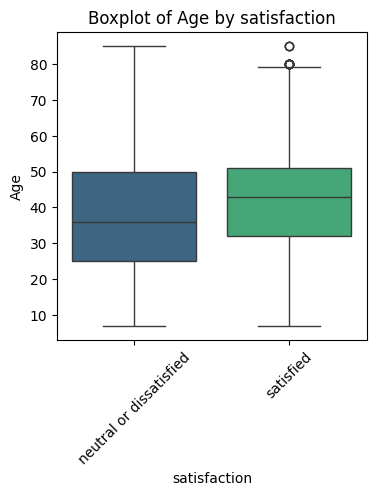

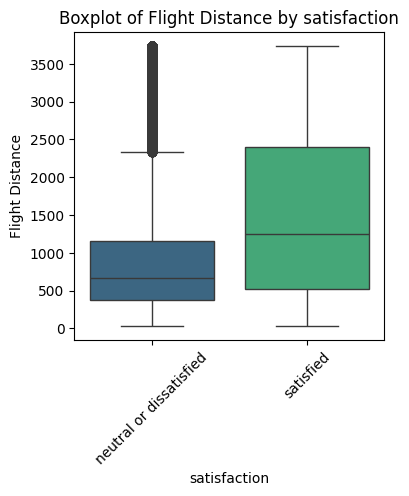

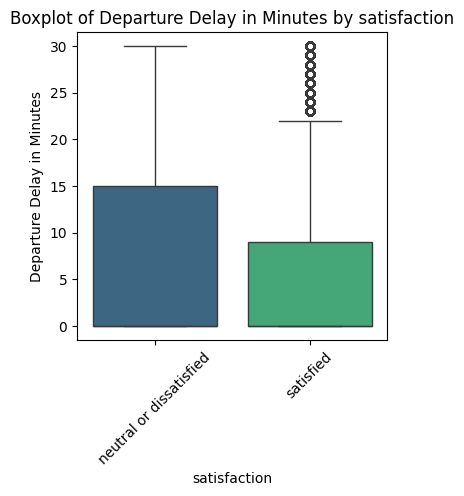

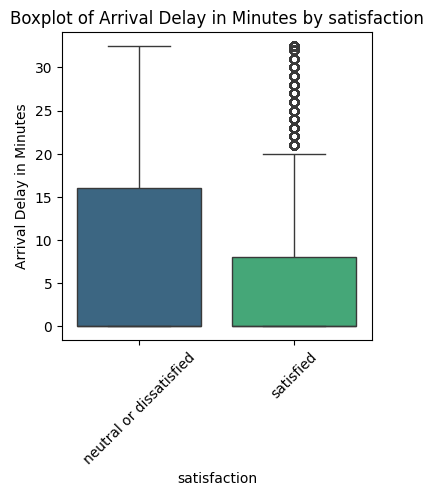

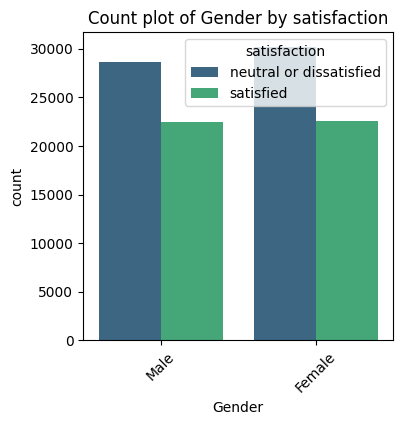

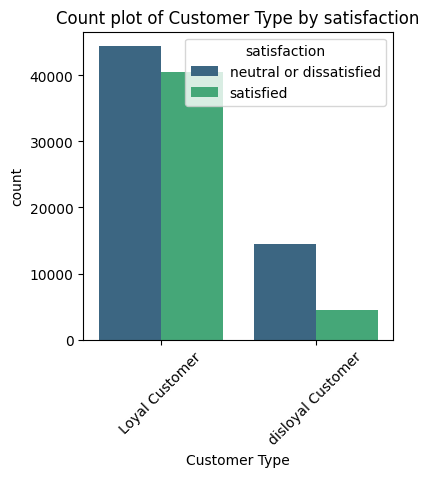

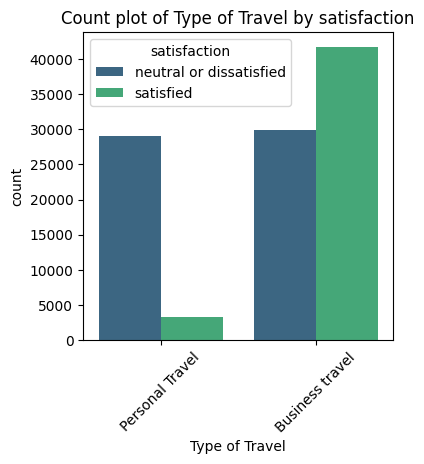

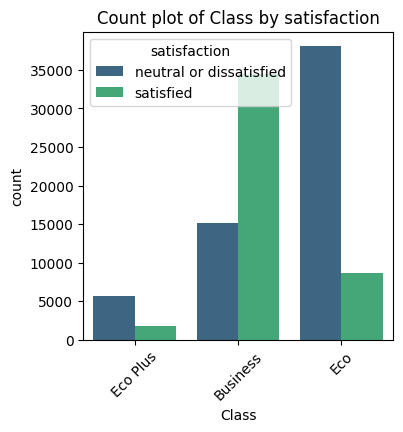

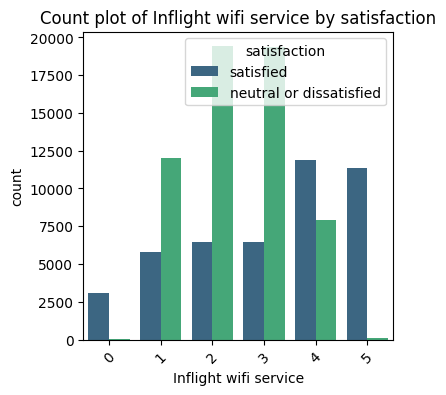

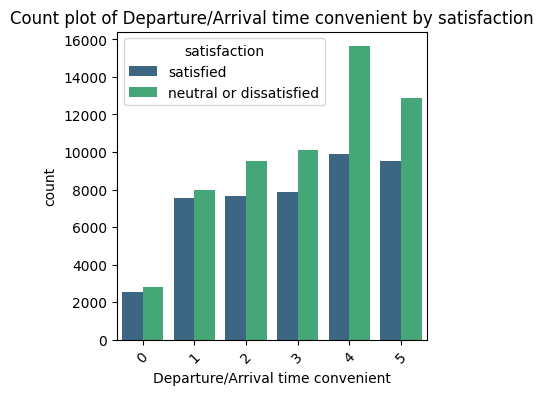

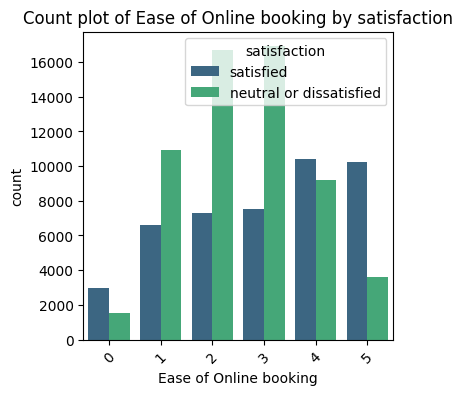

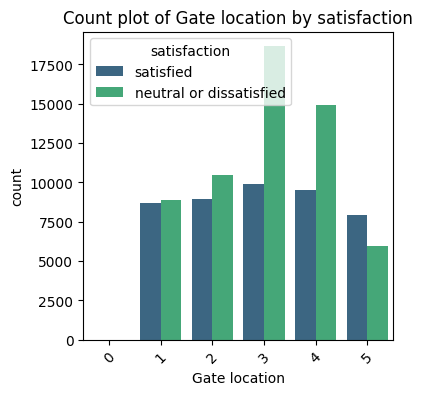

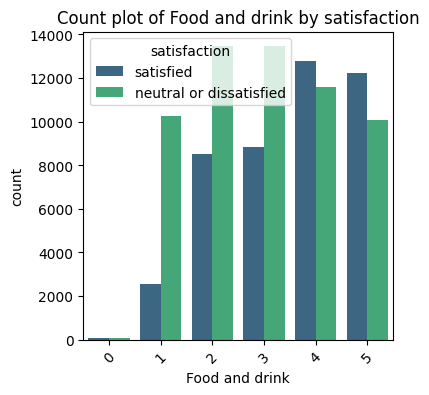

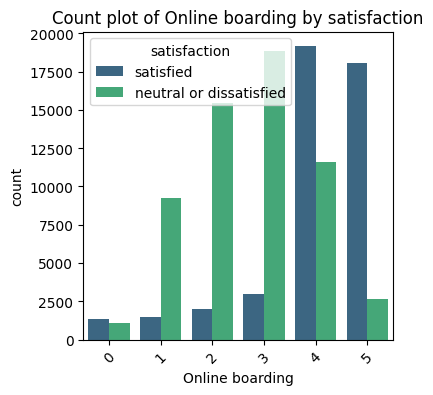

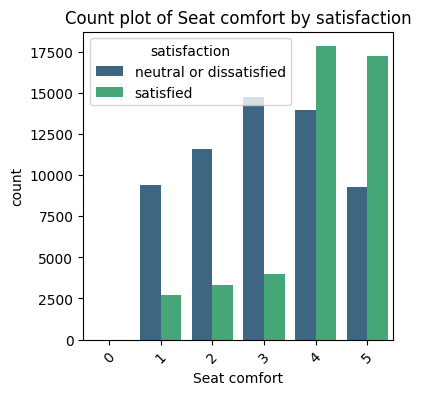

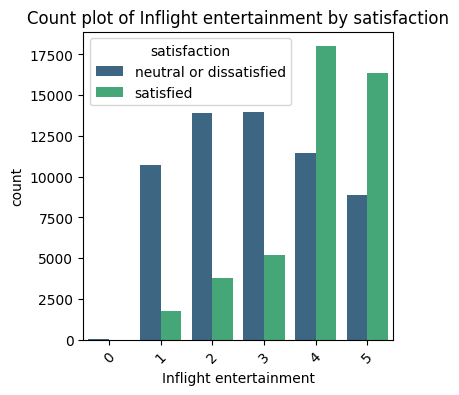

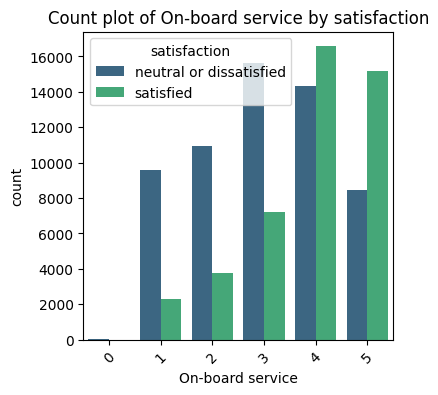

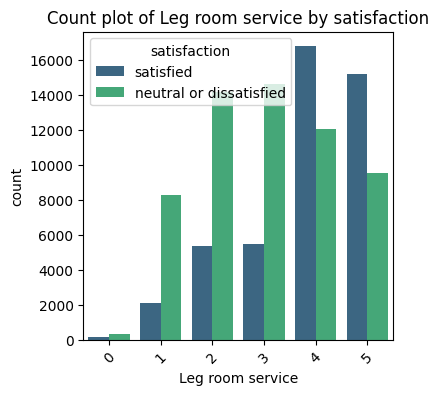

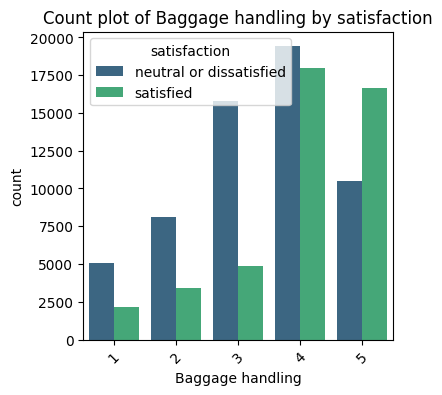

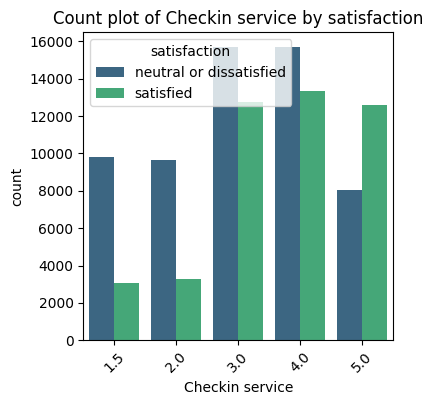

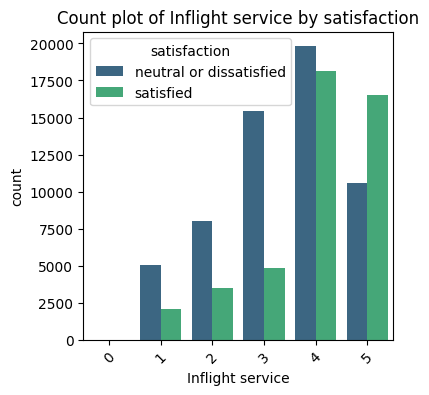

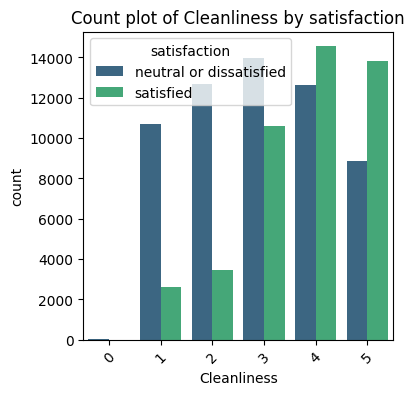

In [29]:
target_col='satisfaction'

#Num vs Target cols
for col in numeric_cols:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=df[target_col],y=df[col],palette='viridis')
    plt.title(f'Boxplot of {col} by {target_col}')
    plt.xticks(rotation=45)
    plt.show()

#Cat vs Target cols
for col in categorical_cols:
    plt.figure(figsize=(4,4))
    sns.countplot(x=df[col],hue=df[target_col],palette='viridis')
    plt.title(f'Count plot of {col} by {target_col}')
    plt.xticks(rotation=45)
    plt.show()


In [30]:
df['Total Delay']=df['Departure Delay in Minutes']+df['Arrival Delay in Minutes']
df['Delay Ratio']=df['Total Delay']/(df['Flight Distance']+1)

In [31]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275


In [32]:
df['Age Group']=pd.cut(df['Age'],bins=[0,18,30,50,100],labels=['Child','Youngster','Adult','Senior'])


In [33]:
df.head(1)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total Delay,Delay Ratio,Age Group
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0,neutral or dissatisfied,43.0,0.093275,Child


In [34]:
from sklearn.preprocessing import LabelEncoder


In [35]:
le=LabelEncoder()
columns_to_encode=['Gender','Customer Type','Type of Travel','Class','satisfaction','Age Group']

label_mappings={}

for col in columns_to_encode:
    df[col]=le.fit_transform(df[col])
    label_mappings[col]=dict(zip(le.classes_,le.transform(le.classes_)))

for col,mapping in label_mappings.items():
    print(f"Mapping for {col} : {mapping}")

Mapping for Gender : {'Female': 0, 'Male': 1}
Mapping for Customer Type : {'Loyal Customer': 0, 'disloyal Customer': 1}
Mapping for Type of Travel : {'Business travel': 0, 'Personal Travel': 1}
Mapping for Class : {'Business': 0, 'Eco': 1, 'Eco Plus': 2}
Mapping for satisfaction : {'neutral or dissatisfied': 0, 'satisfied': 1}
Mapping for Age Group : {'Adult': 0, 'Child': 1, 'Senior': 2, 'Youngster': 3}


In [36]:
df.dtypes

Gender                                 int32
Customer Type                          int32
Age                                    int64
Type of Travel                         int32
Class                                  int32
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                      float64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [37]:
from sklearn.model_selection import train_test_split
x=df.drop(columns='satisfaction')
y=df['satisfaction']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [38]:
from sklearn.feature_selection import mutual_info_classif

mutual_info=mutual_info_classif(x_train,y_train,discrete_features=True)

mutual_info_df=pd.DataFrame({
    'Feature': x.columns,
    'Mutual Information':mutual_info
}).sort_values(by='Mutual Information',ascending=False)

print(mutual_info_df)

                              Feature  Mutual Information
11                    Online boarding            0.211611
23                        Delay Ratio            0.190751
6               Inflight wifi service            0.161543
4                               Class            0.134969
3                      Type of Travel            0.113675
13             Inflight entertainment            0.092882
5                     Flight Distance            0.084806
12                       Seat comfort            0.078537
15                   Leg room service            0.060404
14                   On-board service            0.057027
8              Ease of Online booking            0.051391
19                        Cleanliness            0.051153
2                                 Age            0.046413
16                   Baggage handling            0.042488
18                   Inflight service            0.040945
17                    Checkin service            0.031965
10            

In [39]:
top_features=mutual_info_df.head(12)['Feature'].tolist()

In [39]:
app=['Online boarding', 'Delay Ratio', 'Inflight wifi service', 'Class', 'Type of Travel', 'Flight Distance', 'Inflight entertainment', 'Seat comfort', 'Leg room service', 'On-board service', 'Ease of Online booking', 'Cleanliness']
for col in app:
    print(f"{col} unique values: {df[col].unique()}")
    

Online boarding unique values: [3 5 2 1 4 0]
Delay Ratio unique values: [0.09327549 0.02966102 0.         ... 0.06030856 0.0217803  0.01052104]
Inflight wifi service unique values: [3 2 4 1 5 0]
Class unique values: [2 0 1]
Type of Travel unique values: [1 0]
Flight Distance unique values: [ 460.  235. 1142. ...  974. 1479.  400.]
Inflight entertainment unique values: [5 1 2 3 4 0]
Seat comfort unique values: [5 1 2 3 4 0]
Leg room service unique values: [3 5 4 2 1 0]
On-board service unique values: [4 1 2 3 5 0]
Ease of Online booking unique values: [3 2 5 4 1 0]
Cleanliness unique values: [5 1 2 3 4 0]


In [40]:
final_df=df[top_features+['satisfaction']]

In [41]:
final_df.head(3)

,Online boarding,Delay Ratio,Inflight wifi service,Class,Type of Travel,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Ease of Online booking,Cleanliness,satisfaction
0,3,0.093275,3,2,1,5,460.0,5,3,4,3,5,0
1,3,0.029661,3,0,0,1,235.0,1,5,1,3,1,0
2,5,0.000000,2,0,0,5,1142.0,5,3,4,2,5,1


In [42]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import xgboost as xgb
import lightgbm as lgb

In [43]:
df_sample=final_df.sample(frac=0.05,random_state=42)

x_sample=final_df.drop(columns='satisfaction')
y_sample=final_df['satisfaction']

x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,test_size=0.2,random_state=42)

models={
    'Ada Boost':AdaBoostClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'Logistic Regression':LogisticRegression(),
    'KNNeighbors':KNeighborsClassifier(),
    'GaussianNB':GaussianNB(),
    'Random Forest':RandomForestClassifier(),
    'Decision tree':DecisionTreeClassifier(),
    'xgboost':xgb.XGBClassifier(eval_metric='mlogloss'),
    #'SVC':SVC(),
    'lightgbm':lgb.LGBMClassifier()
}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    model_train_accuracy=accuracy_score(y_train,y_train_pred)

    model_test_accuracy=accuracy_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])

    print('model preformance for traininng set')
    print('accuracy: {:.4f}'.format(model_train_accuracy))

    print('-------------------------------------------------------------------------------')

    print('model preformance for testing set')
    print('accuracy: {:.4f}'.format(model_test_accuracy))

    print('='*35)
    print('\n')

Ada Boost
model preformance for traininng set
accuracy: 0.8968
-------------------------------------------------------------------------------
model preformance for testing set
accuracy: 0.8962


Gradient Boosting
model preformance for traininng set
accuracy: 0.9279
-------------------------------------------------------------------------------
model preformance for testing set
accuracy: 0.9268


Logistic Regression
model preformance for traininng set
accuracy: 0.8235
-------------------------------------------------------------------------------
model preformance for testing set
accuracy: 0.8225


KNNeighbors
model preformance for traininng set
accuracy: 0.9032
-------------------------------------------------------------------------------
model preformance for testing set
accuracy: 0.8616


GaussianNB
model preformance for traininng set
accuracy: 0.8504
-------------------------------------------------------------------------------
model preformance for testing set
accuracy: 0.8528



In [44]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [45]:
x=final_df.drop(columns='satisfaction')
y=final_df['satisfaction']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [47]:
LGBM=lgb.LGBMClassifier()
LGBM.fit(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 35957, number of negative: 47166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 83123, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.432576 -> initscore=-0.271350
[LightGBM] [Info] Start training from score -0.271350


LGBMClassifier()

In [48]:
y_pred=LGBM.predict(x_test)

In [49]:
a=accuracy_score(y_test,y_pred)
p=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)


In [50]:
print(f"accuracy_score {a:.4f}")
print(f"precision_score {p:.4f}")
print(f"recall_score {recall:.4f}")
print(f"f1_score {f1:.4f}")

accuracy_score 0.9438
precision_score 0.9518
recall_score 0.9177
f1_score 0.9345


In [51]:
import pickle

with open("Lgbm_model.pkl",'wb') as file:
    pickle.dump(LGBM,file)

In [52]:
with open("Lgbm_model.pkl",'rb') as file:
    load_model=pickle.load(file)

In [59]:
x_train[5:9]

,Online boarding,Delay Ratio,Inflight wifi service,Class,Type of Travel,Inflight entertainment,Flight Distance,Seat comfort,Leg room service,On-board service,Ease of Online booking,Cleanliness
74700,3,0.036732,2,0,0,2,1578.0,4,2,2,5,1
75793,1,0.005139,1,1,1,1,972.0,1,4,4,1,1
68353,3,0.004643,2,1,1,5,2153.0,3,5,5,2,3
84550,5,0.000000,4,0,0,2,3736.5,5,2,2,4,3


In [58]:
y_train[5:9]

74700    0
75793    0
68353    0
84550    1
Name: satisfaction, dtype: int32

In [63]:
x_new=np.array([
    [3,0.036732,2,0,0,2,1578.0,4,2,2,5,1],
	[1,0.005139,1,1,1,1,972.0,1,4,4,1,1],
	[3,0.004643,2,1,1,5,2153.0,3,5,5,2,3],
	[5,0.000000,4,0,0,2,3736.5,5,2,2,4,3],
])

In [64]:
y_pred_new=load_model.predict(x_new)

In [65]:
y_pred_new

array([0, 0, 0, 1])